In [140]:
import sys, os
#default path for current release 
sys.path.append("/opt/lumerical/v232/api/python/lumapi.py") 
os.path.dirname(os.path.abspath("__file__"))
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import importlib.util
#default path for current release 
spec_lin = importlib.util.spec_from_file_location('lumapi', "/opt/lumerical/v232/api/python/lumapi.py")
#Functions that perform the actual loading
lumapi = importlib.util.module_from_spec(spec_lin)
spec_lin.loader.exec_module(lumapi)

In [3]:
fdtd = lumapi.INTERCONNECT()


In [228]:
J_file="/home/satadrudas/Photonics/Photonic_Ising_chip/Lumerical_files/Sandbox/Maxcut_instances/s_100.txt"
f = open(J_file,"r")
N_spins, number_of_edges = [int(i) for i in f.readline().split()]
J = np.zeros([N_spins,N_spins])
lines = f.readlines()
for line in lines:
    l = line.split()
    r,c,w = int(l[0])-1, int(l[1])-1, float(l[2])
    J[r][c] = w
    J[c][r] = w        
f.close()
J=np.array(J)

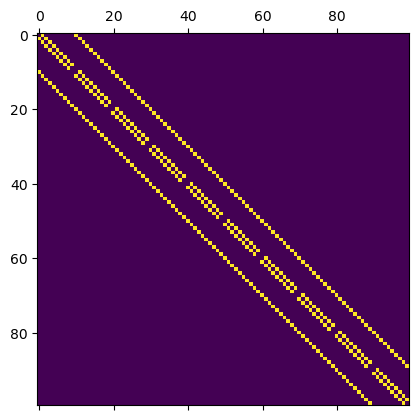

In [229]:
plt.matshow(J)

In [216]:
N_spins = 100
j=np.zeros((N_spins,N_spins))
sq_len = int(np.sqrt(N_spins))




for i in range(0*sq_len,1*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(1*sq_len,2*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(2*sq_len,3*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1

for i in range(8*sq_len,9*sq_len):
    j[i, i+sq_len]=1
    j[i+sq_len,i]=1


for k in range(8*sq_len, 9*sq_len-1):
    j[k, k+1]=1
    j[k+1,k]=1 

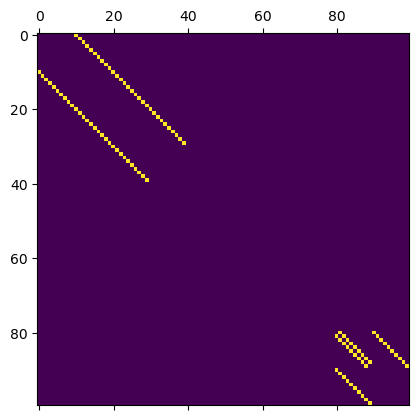

In [217]:
plt.matshow(j)

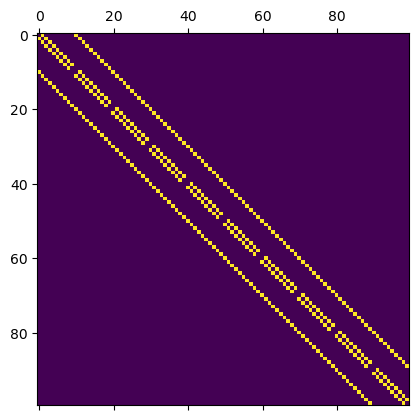

In [222]:
N_spins = 100
j=np.zeros((N_spins,N_spins))
sq_len = int(np.sqrt(N_spins))

for i in range(0,sq_len):
    for k in range(i*sq_len, (i+1)*sq_len-1):
        j[k, k+1]=1
        j[k+1,k]=1 

for i in range(0,sq_len-1):
    for k in range(i*sq_len, (i+1)*sq_len):
        j[k, k+sq_len]=1
        j[k+sq_len,k]=1




plt.matshow(j)

In [224]:
def square_lattice_coupling_matrix_generator(n):
    j=np.zeros((n,n))
    sq_len = int(np.sqrt(n))

    for i in range(0,sq_len):
        for k in range(i*sq_len, (i+1)*sq_len-1):
            j[k, k+1]=1
            j[k+1,k]=1 

    for i in range(0,sq_len-1):
        for k in range(i*sq_len, (i+1)*sq_len):
            j[k, k+sq_len]=1
            j[k+sq_len,k]=1

    return j



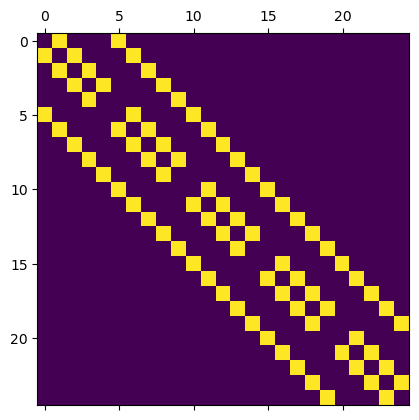

In [227]:
plt.matshow(square_lattice_coupling_matrix_generator(25))

In [230]:
j2= square_lattice_coupling_matrix_generator(100)

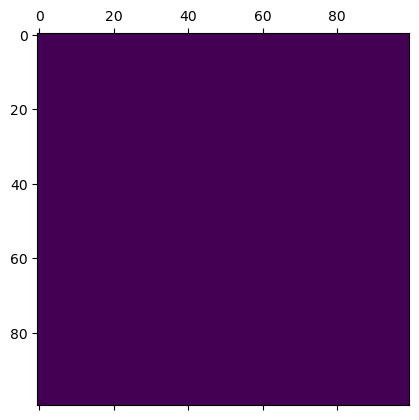

In [232]:
plt.matshow(J-j2)

In [243]:
bit_precision = 8

a= np.random.normal(0,0.2, (5,1))*3
max_a=np.max(np.abs(a))

b= np.random.normal(0,0.2, (5,1))*3
max_b=np.max(np.abs(b))



In [244]:
aa=a/(max_a*(2**bit_precision-1))
aa

array([[-0.0024385 ],
       [-0.00085571],
       [ 0.0030938 ],
       [ 0.00392157],
       [ 0.00340863]])

In [259]:
p=np.random.uniform(-10,10,(5, 1))
p

array([[6.61080558],
       [5.74644042],
       [2.93755367],
       [9.40000897],
       [1.27508567]])

In [260]:
pp=p/(np.max(p))*0.7
pp

array([[0.49229356],
       [0.42792601],
       [0.21875379],
       [0.7       ],
       [0.0949531 ]])

In [262]:
a=np.random.uniform(-10,10,(10, ))
a

array([-6.87686456,  3.7732219 , -0.30465422, -1.30425873, -9.2111134 ,
       -3.47206396,  3.41799755, -1.36983047,  6.11246919,  9.89752631])

In [300]:
bit_precision=3
dac_volts = np.linspace(-4,4, num=2**bit_precision-1, endpoint=True)
bins=dac_volts+np.abs(dac_volts[0]-dac_volts[1])/2
dac_volts,bins

(array([-4.        , -2.66666667, -1.33333333,  0.        ,  1.33333333,
         2.66666667,  4.        ]),
 array([-3.33333333, -2.        , -0.66666667,  0.66666667,  2.        ,
         3.33333333,  4.66666667]))

In [313]:
v=np.array([-1,4,-4, 3.4, 1,3])#np.random.uniform(-4,4,(10, ))
v

array([-1. ,  4. , -4. ,  3.4,  1. ,  3. ])

In [314]:
v_bin_index = np.digitize(v,bins)
v_bin_index

array([2, 6, 0, 6, 4, 5])

In [ ]:
adc_bit_precision=12
adc_volts = np.linspace(-4,4, num=2**adc_bit_precision-1, endpoint=True)
bins=adc_volts+np.abs(adc_volts[0]-adc_volts[1])/2
adc_volts,bins

In [315]:
for i, j in zip(range(0,len(v)),v_bin_index):
    v[i]=dac_volts[j]

v

array([-1.33333333,  4.        , -4.        ,  4.        ,  1.33333333,
        2.66666667])

In [293]:
v=np.array([4.1])
index=np.digitize(v, bins)
index

array([6])

In [281]:
np.abs(dac_volts[0]-dac_volts[1]), -4+0.03149606299212593

(0.03149606299212593, -3.968503937007874)

In [279]:
x = np.array([-0.2, 6.4, 3.0, 9, 11])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([0, 4, 3, 4, 5])

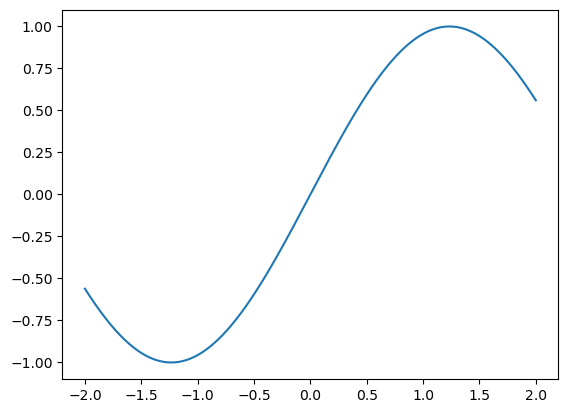

In [258]:
v_pi=4
bias=-np.pi/2
bit_precision=4
total_input=2**8
samples_per_input=10

Nsamples=samples_per_input*total_input
output=np.zeros(Nsamples)

t=np.linspace(-v_pi/2,v_pi/2,Nsamples )

counter=0
for i in t:
    output[counter]=np.cos(i*(v_pi/np.pi)+bias)
    counter=counter+1
    if counter%samples_per_input==0:
        

plt.plot(t, output)




In [255]:
t

array([-2.        , -1.99843689, -1.99687378, ...,  1.99687378,
        1.99843689,  2.        ])